<img src="TED-Talks.jpg">

In [94]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud, STOPWORDS
import datetime

# Loading data and Pre-processing

In [95]:
#load data into dataframe
df = pd.read_csv('ted_main.csv',sep=',', encoding='utf-8')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [96]:
#change film_date and published_date to the format %d-%m-%Y
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['year'] = df['film_date'].apply(lambda x: x.split("-")[2])
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006


# 1. Analyzing talk themes- What are the most popular talk themes?(From both speakers and viewers points of views)

In [97]:
#split the "tags" list into separate rows.
tags = df['tags'].apply(lambda x: pd.Series(str(x)[1:len(str(x))-1].split(',')))

In [98]:
themes = tags.stack().reset_index(level=1,drop=True)
themes.name="theme"
df_themes=df.join(themes)
df_themes['theme'] = df_themes['theme'].apply(lambda x: x.strip()[1:len(x.strip())-1])
df_themes.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,year,theme
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,education


In [99]:
df_themes['theme'].value_counts()

technology           727
science              567
global issues        501
culture              486
TEDx                 450
design               418
business             348
entertainment        299
health               236
innovation           229
society              224
art                  221
social change        218
future               195
communication        191
biology              189
creativity           189
humanity             182
collaboration        174
environment          165
economics            164
medicine             162
brain                158
activism             157
education            153
community            148
history              146
TED Fellows          143
children             143
music                140
                    ... 
sleep                  4
microfinance           4
nuclear weapons        4
CRISPR                 4
urban                  4
vulnerability          4
jazz                   4
ants                   4
mining                 3


In [100]:
# identifying the most popular themes from points of view of speakers (number of ted talks)
theme_talks = pd.DataFrame(df_themes['theme'].value_counts()).reset_index()
theme_talks.columns = ['theme', 'talks']
theme_talks.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


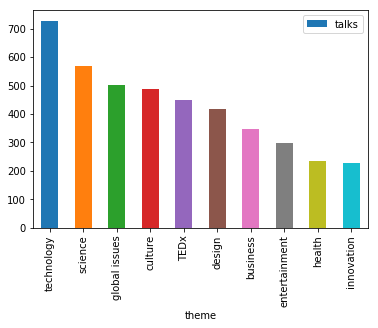

In [101]:
theme_talks.head(10).plot(x='theme', y='talks', kind='bar')

### Observation 1-1: From points of view of speakers, Technology is the most popular theme of talks. Science and Global Issues are the second and the third most popular themes respectively.

In [102]:
#We will only be considering the top 7 themes(excluding TEDx) and talks after 2009, the year when the number of TED Talks really peaked.
pop_theme_talks = df_themes[(df_themes['theme'].isin(theme_talks.head(8)['theme'])) & (df_themes['theme'] != 'TEDx')]
pop_theme_talks['year'] = pop_theme_talks['year'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['year'] > 2008]
top_themes = list(theme_talks.head(8)['theme'])
top_themes.remove('TEDx')

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


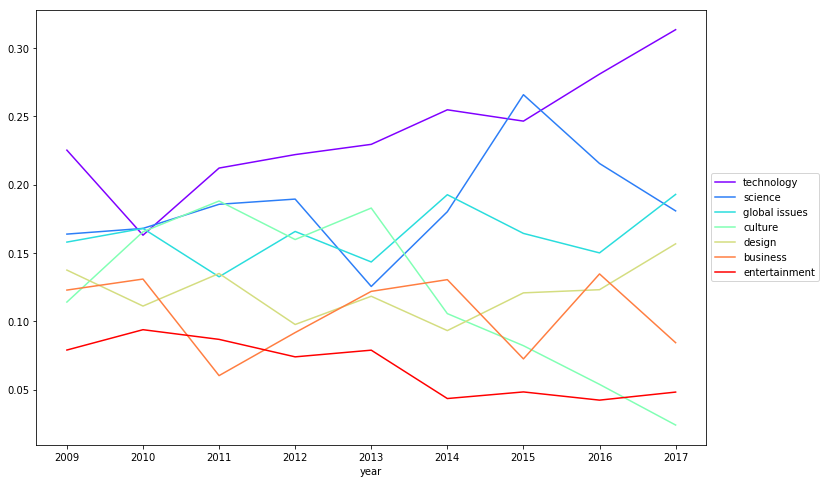

In [103]:
ctab = pd.crosstab([pop_theme_talks['year']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab[top_themes].plot(kind='line', stacked=False, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Observation 1-2: Technology talks look to become more and more popular over the years.  However, talks on culture witnessed a steady dip. And talks on Entertainment declines slightly as well. 

In [104]:
basedate = pd.Timestamp('31-12-2017')
df_themes['days_toNow'] = df_themes['published_date'].apply(lambda x: (basedate - pd.Timestamp(x)).days)
#define a feature views_quotient to normalize the number of views, i.e. the ratio of the number of views to the number of days since it has been published. 
df_themes['views_quo'] = df_themes['views']/df_themes['days_toNow']

In [105]:
# Identifying the most popular themes from points view of viewers(number of views)
theme_views=df_themes.groupby("theme").agg({'views_quo': np.mean})
theme_views.reset_index(inplace=True)
theme_views.sort_values(by="views_quo",ascending=False).head(10)


,theme,views_quo
189,funny,16301.534483
372,success,15546.618514
411,work-life balance,13673.956900
96,biosphere,13286.526949
218,india,11420.002315
272,movies,11238.328021
140,dance,8785.141841
3,Addiction,8239.311867
299,personal growth,7929.722517
199,goal-setting,7913.454161


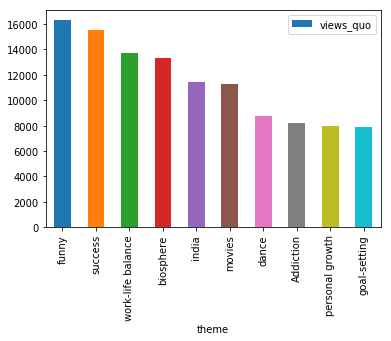

In [106]:
theme_views.sort_values(by="views_quo",ascending=False).head(10).plot.bar(x='theme', y='views_quo')

### Observation 1-3:  From points of view of viewers, funny is the most popular theme for talks, followed by topics: success and work-life balance.

# 2. Analyzing comments: What talk topics tend to trigger hot discussion?

In [107]:
# we quantify the feature discussion by the ratio of the number of comments to the number of views. 
df['discussion'] = df['comments']/df['views']
df.sort_values('discussion', ascending=False).head(10)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,year,discussion
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,01-12-2009,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,17-08-2010,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,2009,0.002220
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,13-07-2010,36,David Bismark,David Bismark: E-voting without fraud,1,02-11-2010,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,2010,0.001534
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,01-02-2002,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,15-04-2007,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,2002,0.001464
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,09-02-2010,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,26-05-2010,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,2010,0.001421
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,02-03-2011,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,07-06-2011,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman\n,1832930,2011,0.001360
840,2374,Lesley Hazleton sat down one day to read the K...,573,TEDxRainier,09-10-2010,35,Lesley Hazleton,Lesley Hazleton: On reading the Koran,1,04-01-2011,"[{'id': 3, 'name': 'Courageous', 'count': 488}...","[{'id': 1772, 'hero': 'https://pe.tedcdn.com/i...","Writer, psychologist","['TEDx', 'culture', 'global issues', 'journali...",On reading the Koran,https://www.ted.com/talks/lesley_hazelton_on_r...,1847256,2010,0.001285
876,555,"It's been said that when an elder dies, it's a...",613,TEDWomen 2010,07-12-2010,30,Elizabeth Lindsey,Elizabeth Lindsey: Curating humanity's heritage,1,23-02-2011,"[{'id': 21, 'name': 'Unconvincing', 'count': 5...","[{'id': 69, 'hero': 'https://pe.tedcdn.com/ima...","Explorer, ethnographer","['anthropology', 'storytelling']",Curating humanity's heritage,https://www.ted.com/talks/elizabeth_lindsey_cu...,439180,2010,0.001264
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,17-03-2014,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,14-07-2014,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764,2014,0.001236
661,2272,"Vaccine-autism claims, ""Frankenfood"" bans, the...",1141,TED2010,10-02-2010,31,Michael Specter,Michael Specter: The danger of science denial,1,12-04-2010,"[{'id': 3, 'name': 'Courageous', 'count': 702}...","[{'id': 801, 'hero': 'https://pe.tedcdn.com/im...",Writer,"['global issues', 'medicine', 'religion', 'sci...",The danger of science denial,https://www.ted.c

In [108]:
df_themes['discussion'] = df_themes['comments']/df_themes['views']
theme_discussion=df_themes.groupby("theme").agg({'discussion': np.mean})
theme_discussion.reset_index(inplace=True)
theme_discussion.sort_values(by="discussion",ascending=False).head(10)

,theme,discussion
84,atheism,0.000586
287,oil,0.000516
24,God,0.000497
56,TED-Ed,0.000420
282,novel,0.000392
253,meme,0.000375
335,religion,0.000357
284,nuclear weapons,0.000336
373,suicide,0.000317
6,Anthropocene,0.000304


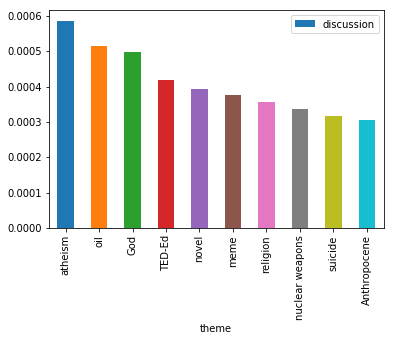

In [109]:
theme_discussion.sort_values(by="discussion",ascending=False).head(10).plot.bar(x='theme', y='discussion')

### Observation 2-1:As we may expect, Religion is always the topic with debated discussion since a few themes such as atheism, God, religion all fall into religion faction.  Oil and nuclear weapons also make it to the list of top 10 themes with hot disccusion.

# 3.Analyzing speakers' occupation: what kind of people TED is most interested in inviting to its events? 

In [110]:
import re
occupations = df['speaker_occupation'].apply(lambda x: pd.Series(re.split(' and |, | + |; |/', str(x))))
occupations = occupations.stack().reset_index(level=1,drop=True)
occupations.name="occupation"
df_occupations=df.join(occupations)
df_occupations

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,year,discussion,occupation
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,0.000096,Author
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,0.000096,educator
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006,0.000083,Climate advocate
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006,0.000076,Technology columnist
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006,0.000118,Activist for environmental justice
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006,0.000049,Global health expert
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006,0.000049,data visionary
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,01-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,2006,0.000032,Life coach
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,01-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https

In [111]:
occupation_talks = pd.DataFrame(df_occupations['occupation'].value_counts()).reset_index()
occupation_talks.columns = ['occupation', 'talks']
occupation_talks.head(10)

,occupation,talks
0,Writer,72
1,Artist,56
2,activist,48
3,Author,48
4,Designer,47
5,Journalist,43
6,Entrepreneur,39
7,Architect,36
8,Inventor,35
9,author,34


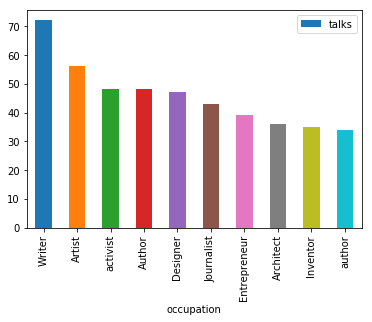

In [112]:
occupation_talks.head(10).plot.bar(x='occupation', y='talks')

### Observation 3-1:Writers are most popular with 72 talks. Artists come a distant second with 56 speakers. You may need to choose writers as career if you want to be a ted talk speaker. :)

# 4. Analyzing Duration: Does duration matter to the popularity of talks?


In [113]:
basedate = pd.Timestamp('31-12-2017')
df['days_toNow'] = df['published_date'].apply(lambda x: (basedate - pd.Timestamp(x)).days)
df['views_quo'] = df['views']/df['days_toNow']

df['duration'] = df['duration']/60

In [114]:
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

Correlation is: -0.001100991038817703


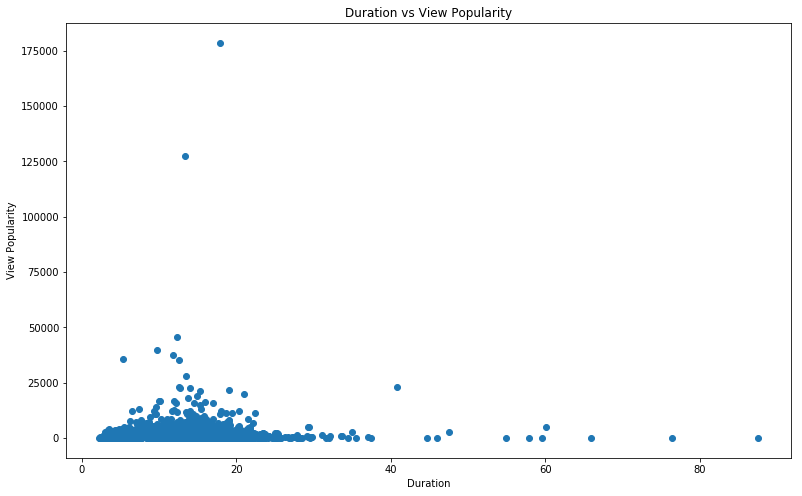

In [115]:
plt.figure(figsize=(13,8))
plt.scatter(df['duration'], df['views_quo'])
plt.xlabel('Duration')
plt.ylabel('View Popularity')
plt.title('Duration vs View Popularity')
correlation = df['views_quo'].corr(df['duration'])
print("{}{}".format("Correlation is: ", correlation))

### Observation 4-1: There is no obvious correlation between the length and the popularity of a TED Talk. So you do not need to worry about the duration of talks. Just say whatever you want to deliver. Content should be the king at TED.

# 5. Analyzing talks' transcripts: What are the most important words used in highly-rated talks?

In [116]:
transcripts = pd.read_csv('transcripts.csv',sep=',', encoding='utf-8')
transcripts.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [117]:
#turns into python dictionary
df['ratings'] = df['ratings'].apply(lambda x: eval(str(x)))
df['ratings'].head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [119]:
#rating descriptors: Funny, Beautiful, Ingenious, Courageous, Longwinded, Confusing, Informative, 
#Fascinating, Unconvincing, Persuasive, Jaw-dropping, OK, Obnoxious, Inspiring

df['aggRating'] = df['ratings'].apply(lambda x: \
                                            x[0]['count']+ \
                                            x[1]['count']+ \
                                            x[2]['count']+ \
                                            x[3]['count']- \
                                            x[4]['count']- \
                                            x[5]['count']+ \
                                            x[6]['count']+ \
                                            x[7]['count']- \
                                            x[8]['count']+ \
                                            x[9]['count']+ \
                                            x[10]['count']- \
                                            x[11]['count']- \
                                            x[12]['count']+ \
                                            x[13]['count'])
df['sumRating'] = df['ratings'].apply(lambda x: \
                                            x[0]['count']+ \
                                            x[1]['count']+ \
                                            x[2]['count']+ \
                                            x[3]['count']+ \
                                            x[4]['count']+ \
                                            x[5]['count']+ \
                                            x[6]['count']+ \
                                            x[7]['count']+ \
                                            x[8]['count']+ \
                                            x[9]['count']+ \
                                            x[10]['count']+ \
                                            x[11]['count']+ \
                                            x[12]['count']+ \
                                            x[13]['count'])

df['aggRating'] = df['aggRating']/df['sumRating']

df_transcripts=df.merge(transcripts, how='inner', on="url")

In [120]:
df_transcripts

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,title,url,views,year,discussion,days_toNow,views_quo,aggRating,sumRating,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,...,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,0.000096,4206,11228.509272,0.950730,93850,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,...,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006,0.000083,4206,760.941512,0.489101,2936,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,...,Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006,0.000076,4206,389.037565,0.552408,2824,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",18.600000,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,...,Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006,0.000118,4206,403.601997,0.208155,3728,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,...,The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006,0.000049,4205,2855.141260,0.542155,25620,"About 10 years ago, I took on the task to teac..."
5,672,"Tony Robbins discusses the ""invisible forces"" ...",21.750000,TED2006,01-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,27-06-2006,...,Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,2006,0.000032,4205,4919.239239,0.033082,15356,Thank you. I have to tell you I'm both challen...
6,919,When two young Mormon missionaries knock on Ju...,16.533333,TED2006,23-02-2006,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,09-07-2006,...,Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987,2006,0.000244,4133,912.167191,0.578860,5998,"On September 10, the morning of my seventh bir..."
7,46,Architect Joshua Prince-Ramus takes the audien...,19.966667,TED2006,22-02-2006,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,09-07-2006,...,Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,2006,0.000048,4133,234.149770,0.429688,1024,I'm going to present three projects in rapid f...
8,852,Philosopher Dan Dennett calls for religion -- ...,24.750000,TED2006,01-02-2006,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,17-07-2006,...,Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958,2006,0.000332,4185,613.610036,0.471363,3946,It's wonderful to be back. I love this wonderf...
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",21.033333,TED2006,24-02-2006,31,Rick Warren,Rick Warren: A life of purpose,1,17-07-2006,...,A life of purpose,https://www.ted.com/talks/rick_warren_on_a_lif...,3095993,2006,0.000291,4185,739.783274,0.641648,8327,"I'm often asked, ""What surprised you about the..."


In [121]:
high_rating_df_transcripts_df= df_transcripts[df_transcripts["aggRating"]>=df_transcripts["aggRating"].mean()]
high_rating_df_transcripts_df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,title,url,views,year,discussion,days_toNow,views_quo,aggRating,sumRating,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,...,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,0.000096,4206,11228.509272,0.950730,93850,Good morning. How are you?(Laughter)It's been ...
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,...,Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006,0.000076,4206,389.037565,0.552408,2824,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,...,The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006,0.000049,4205,2855.141260,0.542155,25620,"About 10 years ago, I took on the task to teac..."
6,919,When two young Mormon missionaries knock on Ju...,16.533333,TED2006,23-02-2006,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,09-07-2006,...,Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987,2006,0.000244,4133,912.167191,0.578860,5998,"On September 10, the morning of my seventh bir..."
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",21.033333,TED2006,24-02-2006,31,Rick Warren,Rick Warren: A life of purpose,1,17-07-2006,...,A life of purpose,https://www.ted.com/talks/rick_warren_on_a_lif...,3095993,2006,0.000291,4185,739.783274,0.641648,8327,"I'm often asked, ""What surprised you about the..."
13,242,"Jeff Han shows off a cheap, scalable multi-tou...",8.783333,TED2006,05-02-2006,27,Jeff Han,Jeff Han: The radical promise of the multi-tou...,1,31-07-2006,...,The radical promise of the multi-touch interface,https://www.ted.com/talks/jeff_han_demos_his_b...,4531020,2006,0.000053,4171,1086.315032,0.833113,8317,I'm really excited to be here today. I'll show...
15,325,Violinist Sirena Huang gives a technically bri...,24.683333,TED2006,22-02-2006,31,Sirena Huang,Sirena Huang: An 11-year-old's magical violin,1,07-08-2006,...,An 11-year-old's magical violin,https://www.ted.com/talks/sirena_huang_dazzles...,2702470,2006,0.000120,4194,644.365761,0.643533,6239,(Music)(Music ends)(Applause)(Applause ends)Hi...
21,185,Performer and web toymaker Ze Frank delivers a...,18.933333,TED2004,23-02-2004,26,Ze Frank,Ze Frank: Nerdcore comedy,1,24-08-2006,...,Nerdcore comedy,https://www.ted.com/talks/ze_frank_s_nerdcore_...,6141440,2004,0.000030,4147,1480.935616,0.577847,5164,"You know, when Chris first approached me to sp..."
25,184,Legendary scientist David Deutsch puts theoret...,19.000000,TEDGlobal 2005,13-07-2005,29,David Deutsch,David Deutsch: Chemical scum that dream of dis...,1,11-09-2006,...,Chemical scum that dream of distant quasars,https://www.ted.com/talks/david_deutsch_on_our...,1096862,2005,0.000168,4070,269.499263,0.551919,3544,We've been told to go out on a limb and say so...
28,355,"""Tipping Point"" author Malcolm Gladwell gets i...",17.500000,TED2004,25-02-2004,37,Malcolm Gladwell,"Malcolm Gladwell: Choice, happiness and spaghe...",1,18-09-2006,...,"Choice, happiness and spaghetti sauce",https://www.ted.com/talks/malcolm_gladwell_on_...,7023562,2004,0.000051,4122,1703.920912,0.607792,10678,I think I was supposed to talk about my new bo...


In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we use tf–idf(term frequency–inverse document frequency) to reflect how important a word is to a ted speech in the collection.
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1),
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.9)      # cut words present in more than 90% of documents

def count_words(terms, feature_matrix):
    sums = feature_matrix.sum(axis=0)
    data = []
    for col, term in enumerate(terms):
        data.append( (term, sums[0,col]) )
    ranked = pd.DataFrame(data, columns=['term','count']).sort_values('count', ascending=False)
    return ranked

high_rating_dtm = vectorizer.fit_transform(high_rating_df_transcripts_df['transcript'])
high_rating_counts = count_words(terms=vectorizer.get_feature_names(), feature_matrix=high_rating_dtm)

In [123]:
high_rating_counts.head(20)

,term,count
1165,people,101.723811
903,laughter,72.648928
704,going,66.167985
884,know,65.770616
1617,think,63.931821
1308,really,63.383335
1706,ve,58.696887
1781,world,57.525581
1626,time,56.799181
54,actually,55.194028


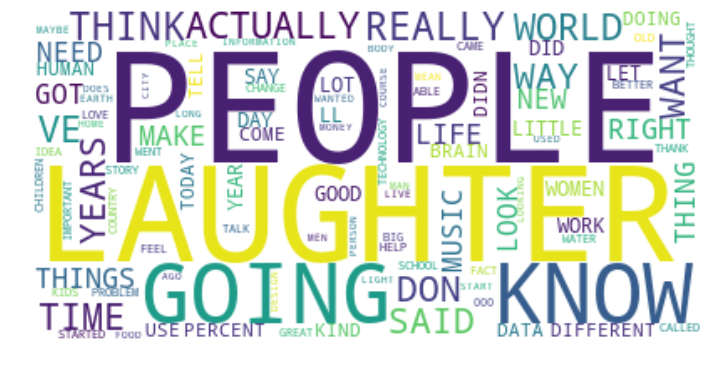

In [124]:
dic = {high_rating_counts.loc[i,'term'].upper(): high_rating_counts.loc[i,'count'] for i in range(0,len(high_rating_counts))}

wordcloud = WordCloud(background_color='white',
                      max_words=100).generate_from_frequencies(dic)
fig = plt.figure(1,figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


### Observation 5-1: Laughter, people, know, think, make,right, life, new, etc. are among the most popular words used in highly-rated TED Speeches. 